## Punto 1

In [121]:
import numpy as np #
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [122]:
def white_patch(image):
    """
    Aplica el algoritmo de white patch para balance de blancos.  
    Args:
        image (numpy.ndarray): Imagen de entrada en formato BGR.
    Returns:
        numpy.ndarray: Imagen con balance de blancos aplicado.
    """
    
    # Convertir la imagen a float32 para evitar saturación
    img_float = image.astype(np.float32)

    # Encontrar los valores máximos en cada canal
    max_b = np.max(img_float[:, :, 0])
    max_g = np.max(img_float[:, :, 1])
    max_r = np.max(img_float[:, :, 2])
    
    print(f"Max B: {max_b}, Max G: {max_g}, Max R: {max_r}")

    # Calcular los factores de escala
    scale_b = 255 / max_b
    scale_g = 255 / max_g
    scale_r = 255 / max_r

    # Aplicar los factores de escala
    img_float[:, :, 0] *= scale_b
    img_float[:, :, 1] *= scale_g
    img_float[:, :, 2] *= scale_r

    # Asegurarse de que los valores estén en el rango [0, 255]
    img_float = np.clip(img_float, 0, 255)

    # Convertir de nuevo a uint8
    balanced_image = img_float.astype(np.uint8)

    return balanced_image

Max B: 165.0, Max G: 138.0, Max R: 200.0


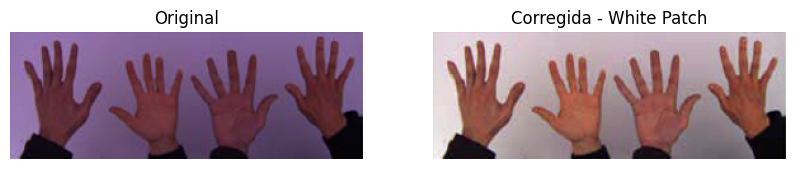

Max B: 210.0, Max G: 250.0, Max R: 171.0


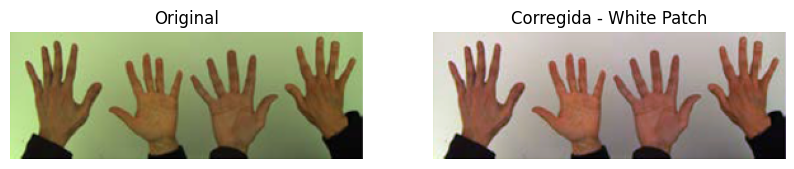

Max B: 247.0, Max G: 157.0, Max R: 175.0


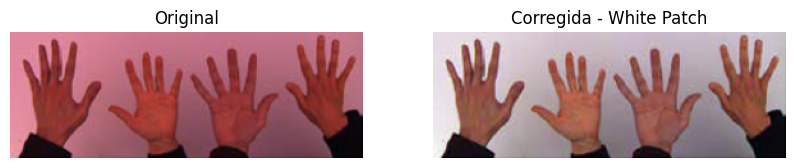

Max B: 255.0, Max G: 255.0, Max R: 255.0


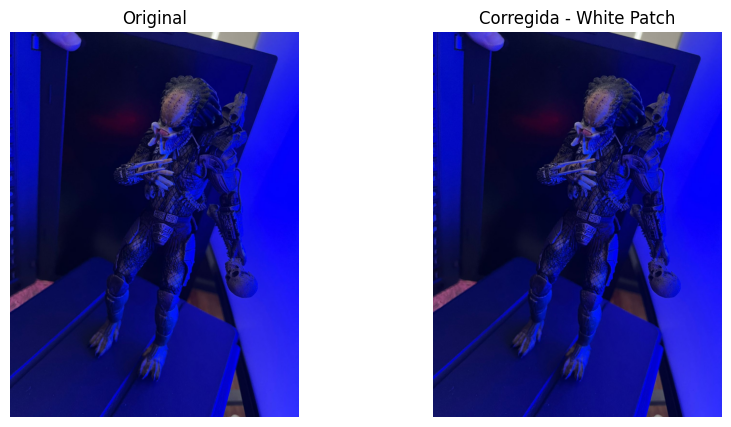

Max B: 126.0, Max G: 252.0, Max R: 155.0


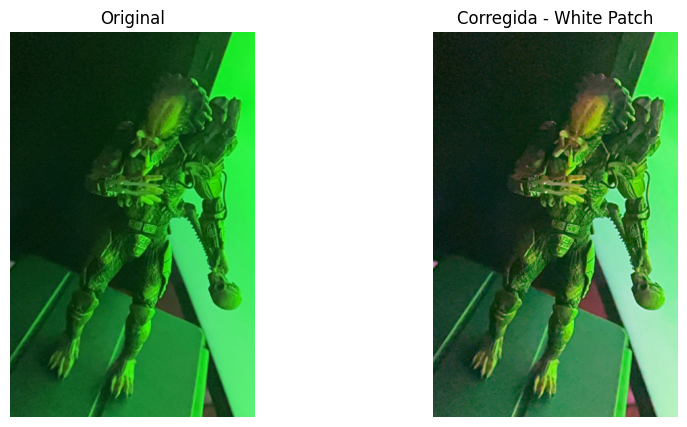

Max B: 170.0, Max G: 255.0, Max R: 172.0


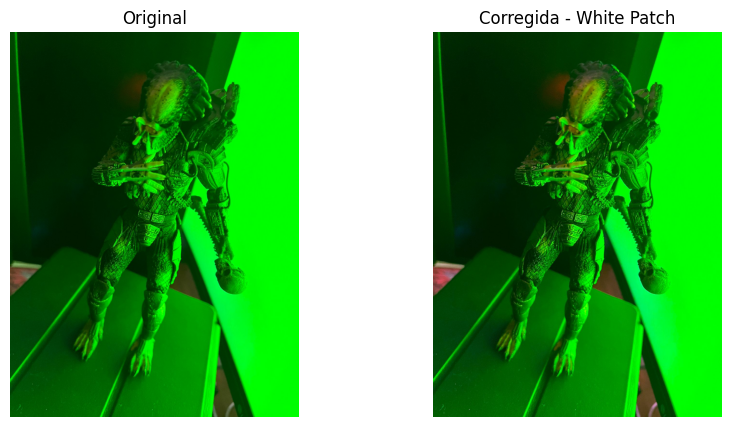

Max B: 255.0, Max G: 134.0, Max R: 122.0


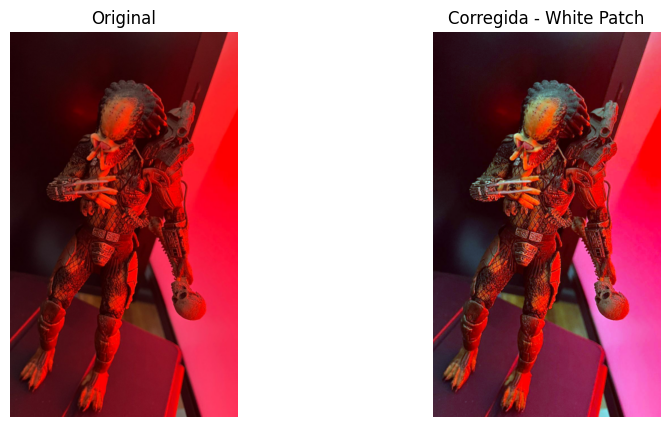

Max B: 255.0, Max G: 201.0, Max R: 203.0


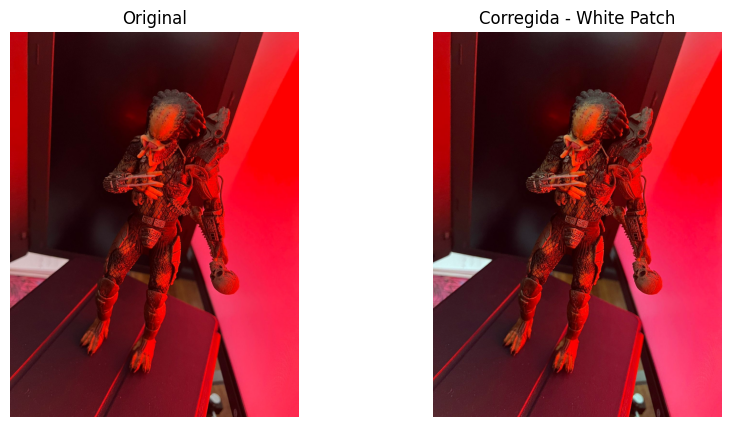

In [123]:

# Cargo directorio de imagenes
dir_images = Path("assets/white_patch/")

# 1. Obtén el iterador
lista_imagenes = sorted(list(dir_images.iterdir()))

# Recorro imagenes y aplico correccion con algoritmo white patch
for img_path in lista_imagenes:
    
    img = cv2.imread(str(img_path))  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_corrected = white_patch(img.copy())
   
    plt.figure(figsize=(10,5))

   
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    
    plt.subplot(1, 2, 2)
    plt.imshow(img_corrected)
    plt.title("Corregida - White Patch")
    plt.axis("off")

    plt.show()


Las primeras imagenes al no tener pixeles maximos iguales a 255, podemos ver que la correccion es muy buena. Sin embargo en las otras, especialmente, en la `wp_blue.jpg` donde para los 3 canales (R,G,B) los maximos llegan a 255; y por lo tanto, la correccion es nula.
Para mejorar estos casos, vamos a tomar un percentil en lugar del máximo.

In [124]:
def white_patch_percentil(image, percentil=98):
    """
    Aplica el algoritmo de white patch para balance de blancos.  
    Args:
        image (numpy.ndarray): Imagen de entrada en formato BGR.
    Returns:
        numpy.ndarray: Imagen con balance de blancos aplicado.
    """
    
    # Convertir la imagen a float32 para evitar saturación
    img_float = image.astype(np.float32)

    # Encontrar los valores máximos en cada canal
    max_b = np.percentile( img_float[:, :, 0], percentil)
    max_g = np.percentile( img_float[:, :, 1], percentil)
    max_r = np.percentile( img_float[:, :, 2], percentil)
    
    print(f"Max B: {max_b}, Max G: {max_g}, Max R: {max_r}")

    # Calcular los factores de escala
    scale_b = 255 / max_b
    scale_g = 255 / max_g
    scale_r = 255 / max_r

    # Aplicar los factores de escala
    img_float[:, :, 0] *= scale_b
    img_float[:, :, 1] *= scale_g
    img_float[:, :, 2] *= scale_r

    # Asegurarse de que los valores estén en el rango [0, 255]
    img_float = np.clip(img_float, 0, 255)

    # Convertir de nuevo a uint8
    balanced_image = img_float.astype(np.uint8)

    return balanced_image

Max B: 117.0, Max G: 86.0, Max R: 254.0


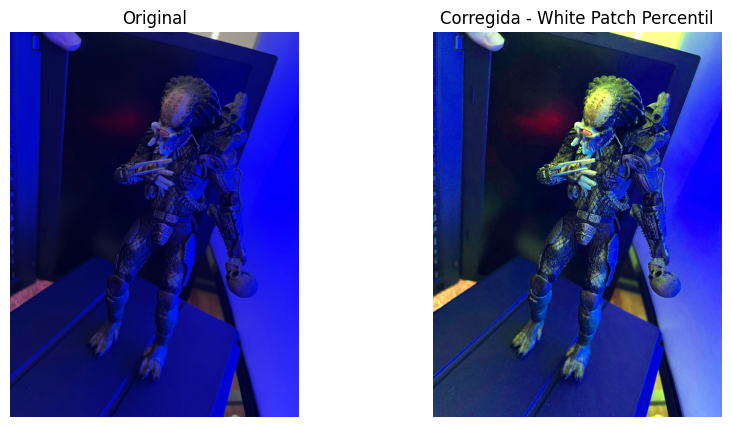

Max B: 88.0, Max G: 244.0, Max R: 120.0


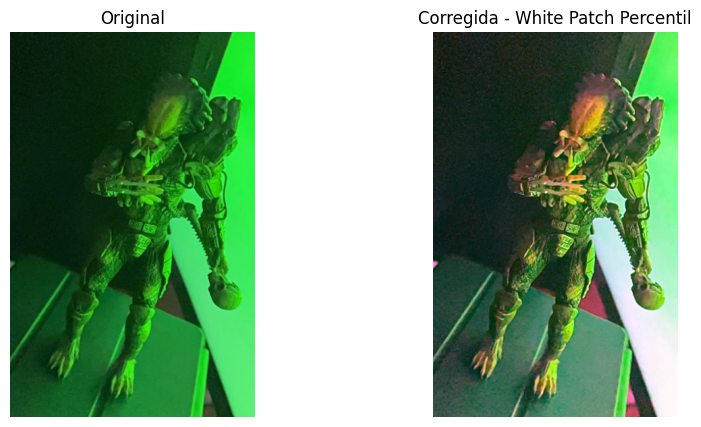

Max B: 70.0, Max G: 255.0, Max R: 56.0


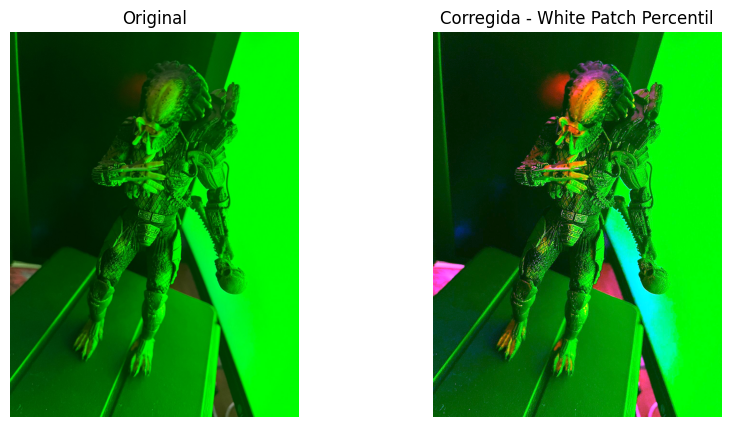

Max B: 255.0, Max G: 74.0, Max R: 102.0


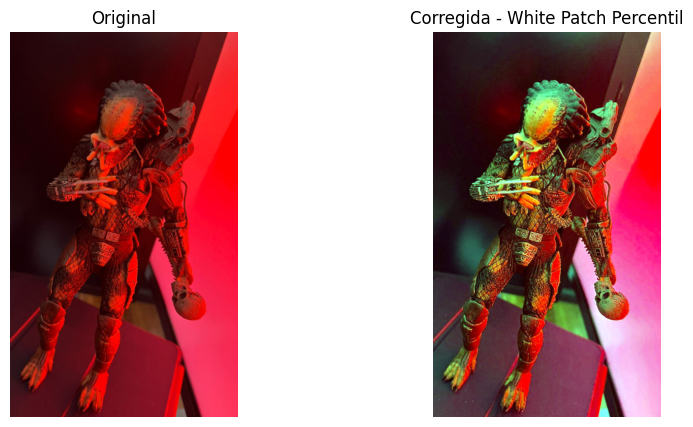

Max B: 255.0, Max G: 119.0, Max R: 119.0


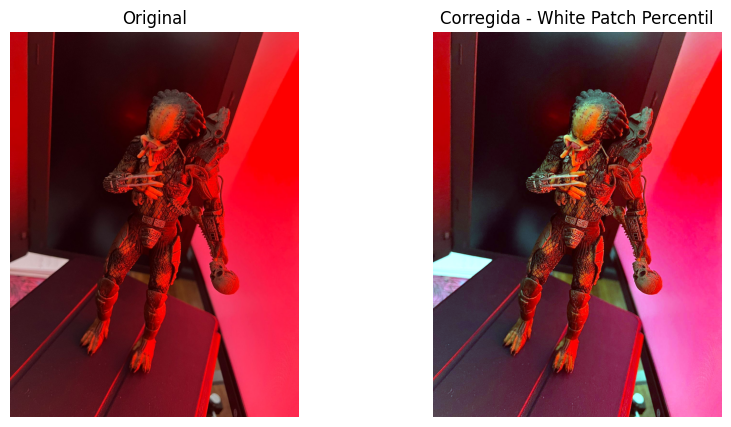

In [125]:

# Cargo directorio de imagenes
dir_images = Path("assets/white_patch/")

# Armo lista de imagenes ordenadas
lista_imagenes = sorted(list(dir_images.iterdir()))
                        
# Filtro las imagenes de las manos porque los resultados logradas ya fueron buenos
lista_imagenes = [p for p in lista_imagenes if p.name.startswith("wp")]

# Recorro imagenes y aplico correccion con algoritmo white patch
for img_path in lista_imagenes:
    
    img = cv2.imread(str(img_path))  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_corrected = white_patch_percentil(img.copy(), 99)
   
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    
    plt.subplot(1, 2, 2)
    plt.imshow(img_corrected)
    plt.title("Corregida - White Patch Percentil")
    plt.axis("off")

    plt.show()


## Punto 2

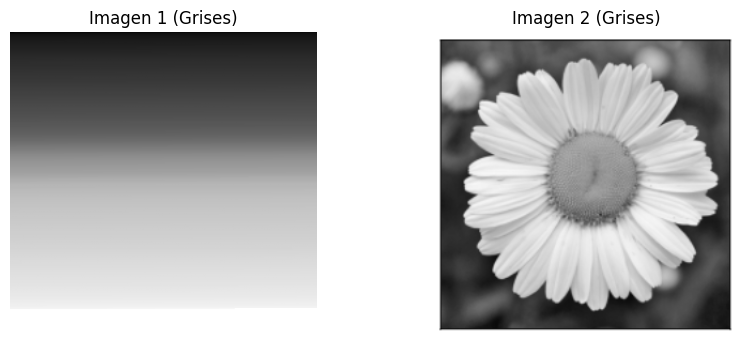

In [126]:
PATH_IMG_1 = "assets/img1_tp.png"
PATH_IMG_2 = "assets/img2_tp.png"

img1 = cv2.imread(PATH_IMG_1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(PATH_IMG_2, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1 (Grises)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2 (Grises)")
plt.axis('off')

plt.show()


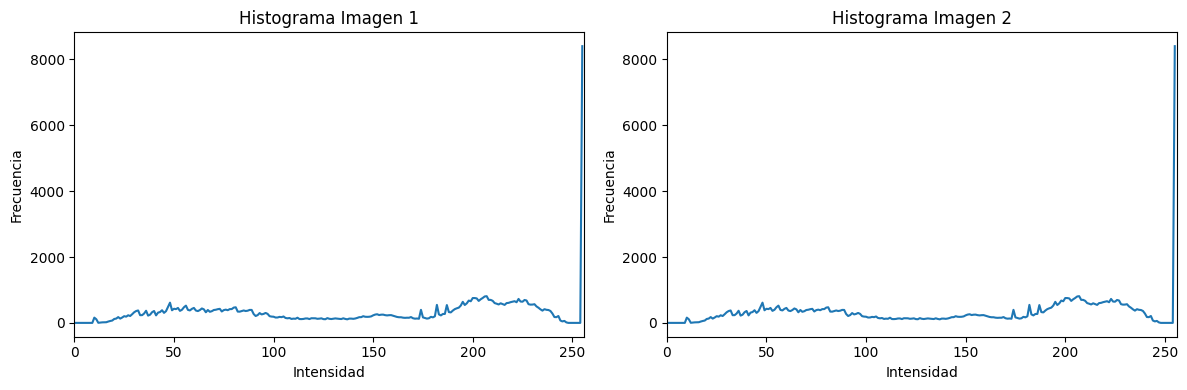

In [129]:
# Armo histogramas
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist1)
plt.title("Histograma Imagen 1")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.plot(hist2)
plt.title("Histograma Imagen 2")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Analizando los histogramas podemos ver que ambos tienen una forma practicamente identica. Sin embargo, las imagenes que representan son completamente distintas: una corresponde a un degradado en escala de grises, mientras que la otra es una flor. 
Esto se da debido a que los histogramas solo representan la frecuencia de las intensidades pero no reflejan información espacial de los pixeles. 
Es por esta razon que, la información reflejada por los histogramas no es suficiente para modelos de clasificación donde es necesario reconocer formas para identificar correctamente objetos.